In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [30]:
df=pd.read_csv("wine.data")
column_names=["class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium"," Total phenols"," Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","	Hue","OD280/OD315 of diluted wines","Proline "]
df=pd.read_csv("wine.data",names=column_names)
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,\tHue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


C:\Users\Msc 1\AppData\Local\Temp\ipykernel_5680\2408563063.py:2: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
c:\Users\Msc 1\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


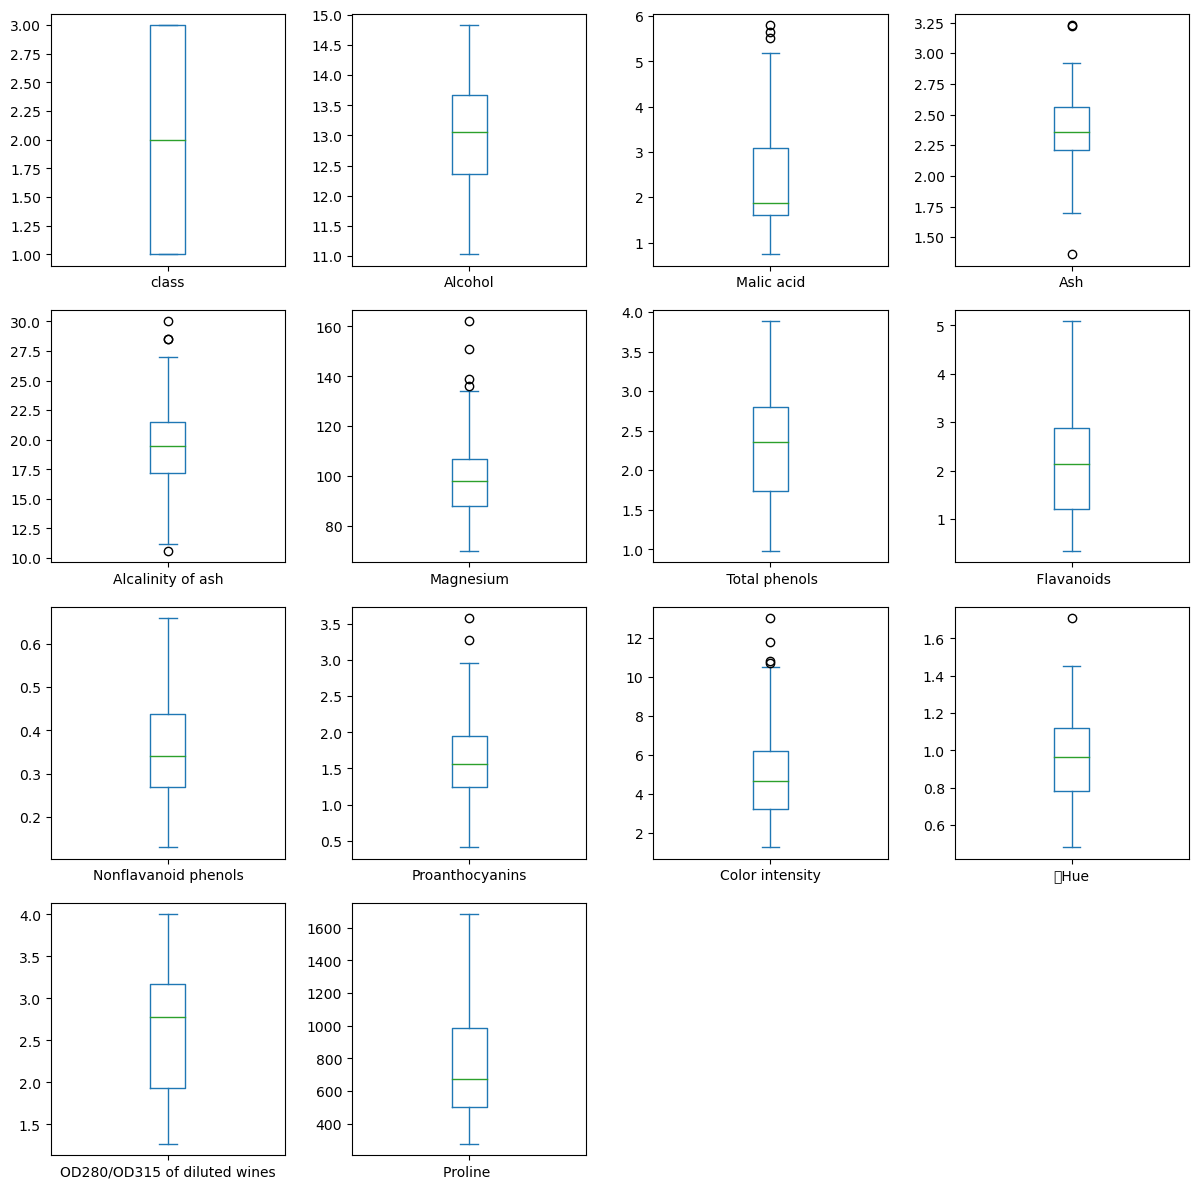

In [31]:

df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))
plt.tight_layout()
plt.show()

c:\Users\Msc 1\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


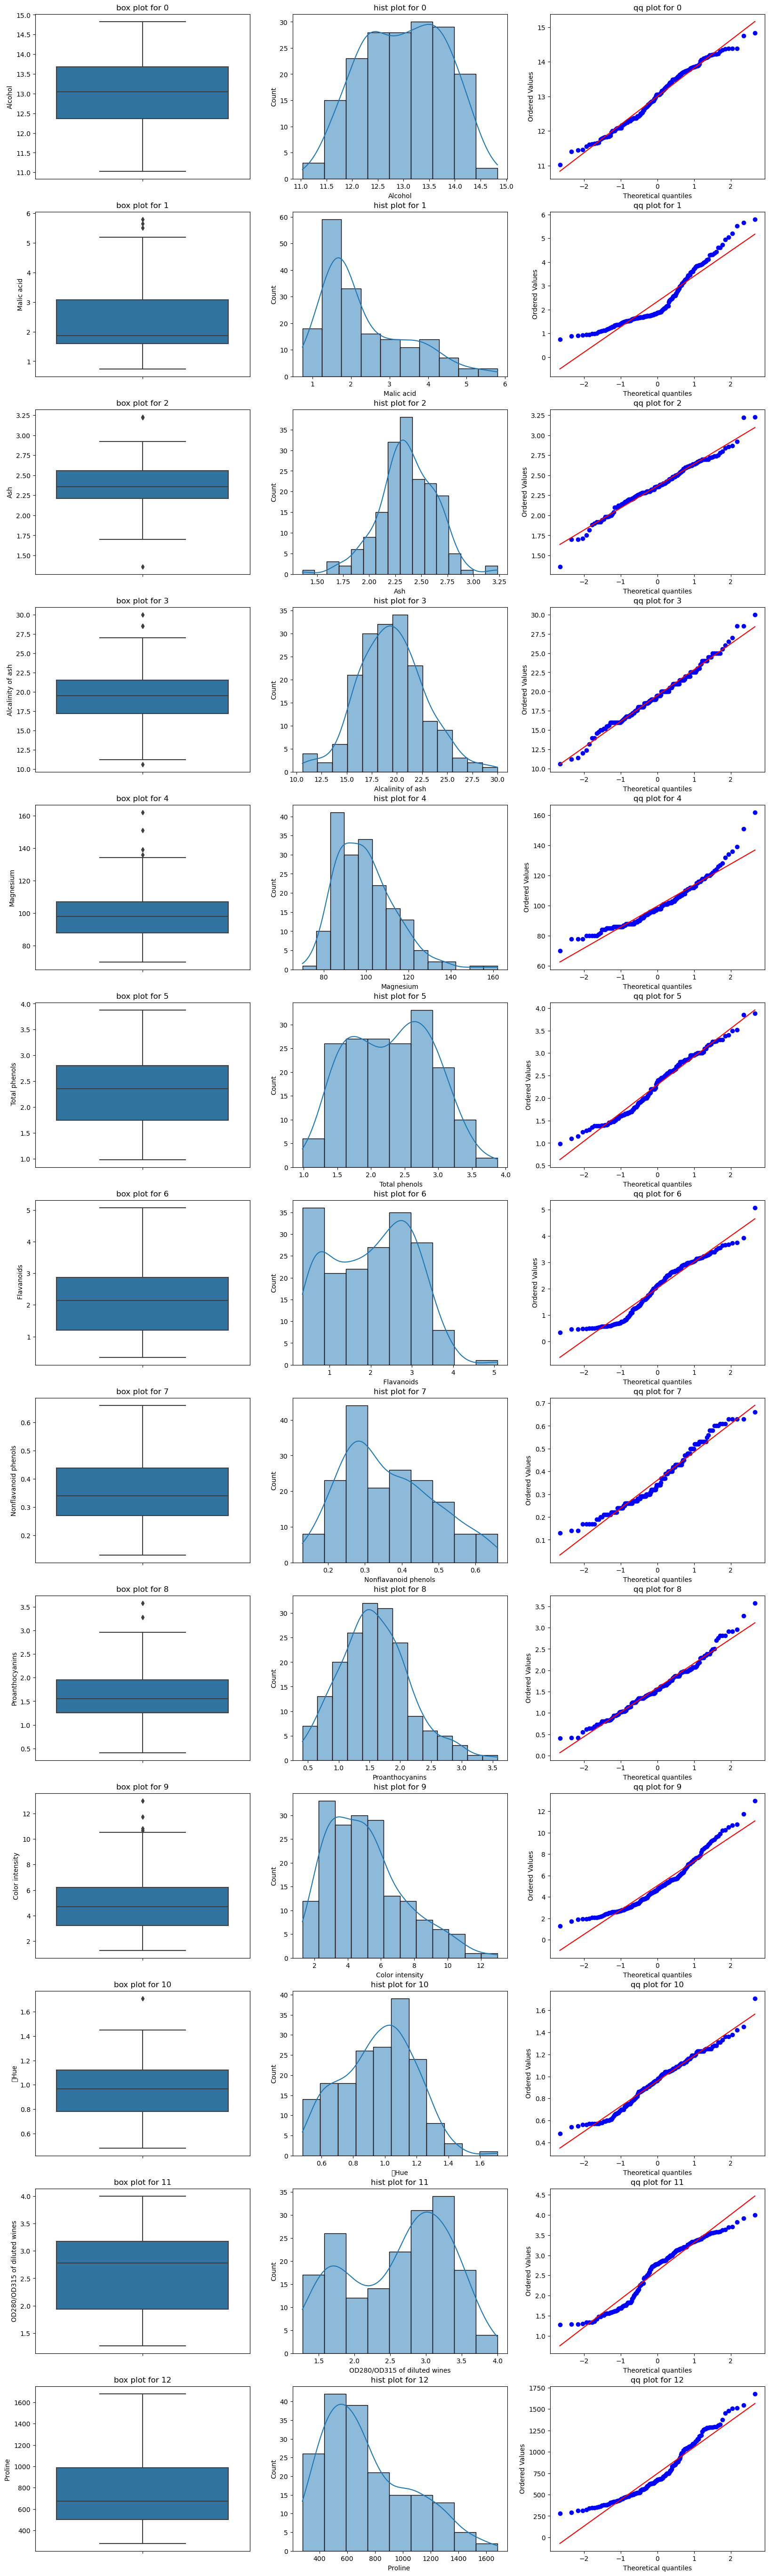

In [38]:
plt.figure(figsize=(20,70))
j=1

features=["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium"," Total phenols"," Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","	Hue","OD280/OD315 of diluted wines","Proline "]
for i in range(len(features)):

    plt.subplot(13,3,j)
    sns.boxplot(data=df,y=features[i])
    j+=1
    plt.title("box plot for {}".format(i))

    plt.subplot(13,3,j)
    sns.histplot(data=df,x=features[i],kde=True)
    j+=1
    plt.title("hist plot for {}".format(i))

    plt.subplot(13,3,j)
    sp.stats.probplot(df[features[i]],plot=plt)
    j+=1
    plt.title("qq plot for {}".format(i))

plt.show()


## inferences
Alcohol--->  normallly distributed
Malic acid ---->right skewed                     
Ash----->left skewed                       
Alcalinity of ash  --->normally distribued            
Magnesium--->right skewed                      
 Total phenols--->right skewed                  
 Flavanoids---->right skewed                   
Nonflavanoid phenols---->right skewed           
Proanthocyanins ---->right skewed                
Color intensity ---->right skewed               
\tHue ---->right skewed                          
OD280/OD315 of diluted wines---->normally distributed   
Proline ---->right skewed


In [40]:
x=df.skew()
x

class                           0.107431
Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
 Total phenols                  0.086639
 Flavanoids                     0.025344
Nonflavanoid phenols            0.450151
Proanthocyanins                 0.517137
Color intensity                 0.868585
\tHue                           0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

## Nomralized every features

In [41]:

features=["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium"," Total phenols"," Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","	Hue","OD280/OD315 of diluted wines","Proline "]
features_boxcox=[]
for i in range(len(features)):
    feat,lamda=sp.stats.boxcox(df[features[i]])
    feat_boxcox=(((df[features[i]])**lamda)-1/lamda).skew()
    print("{}={}".format(features[i],feat_boxcox))


Alcohol=-0.023100216903530844
Malic acid=-0.027055332789018924
Ash=0.05451952647078151
Alcalinity of ash=0.017988223145092033
Magnesium=-0.00635291338860599
 Total phenols=-0.06103072489920049
 Flavanoids=-0.18608909661348877
Nonflavanoid phenols=-0.021171264030044774
Proanthocyanins=0.004079668699416919
Color intensity=-0.007184282948013868
	Hue=-0.04335743834829819
OD280/OD315 of diluted wines=-0.17374922969904238
Proline =-0.0120549314737114


c:\Users\Msc 1\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


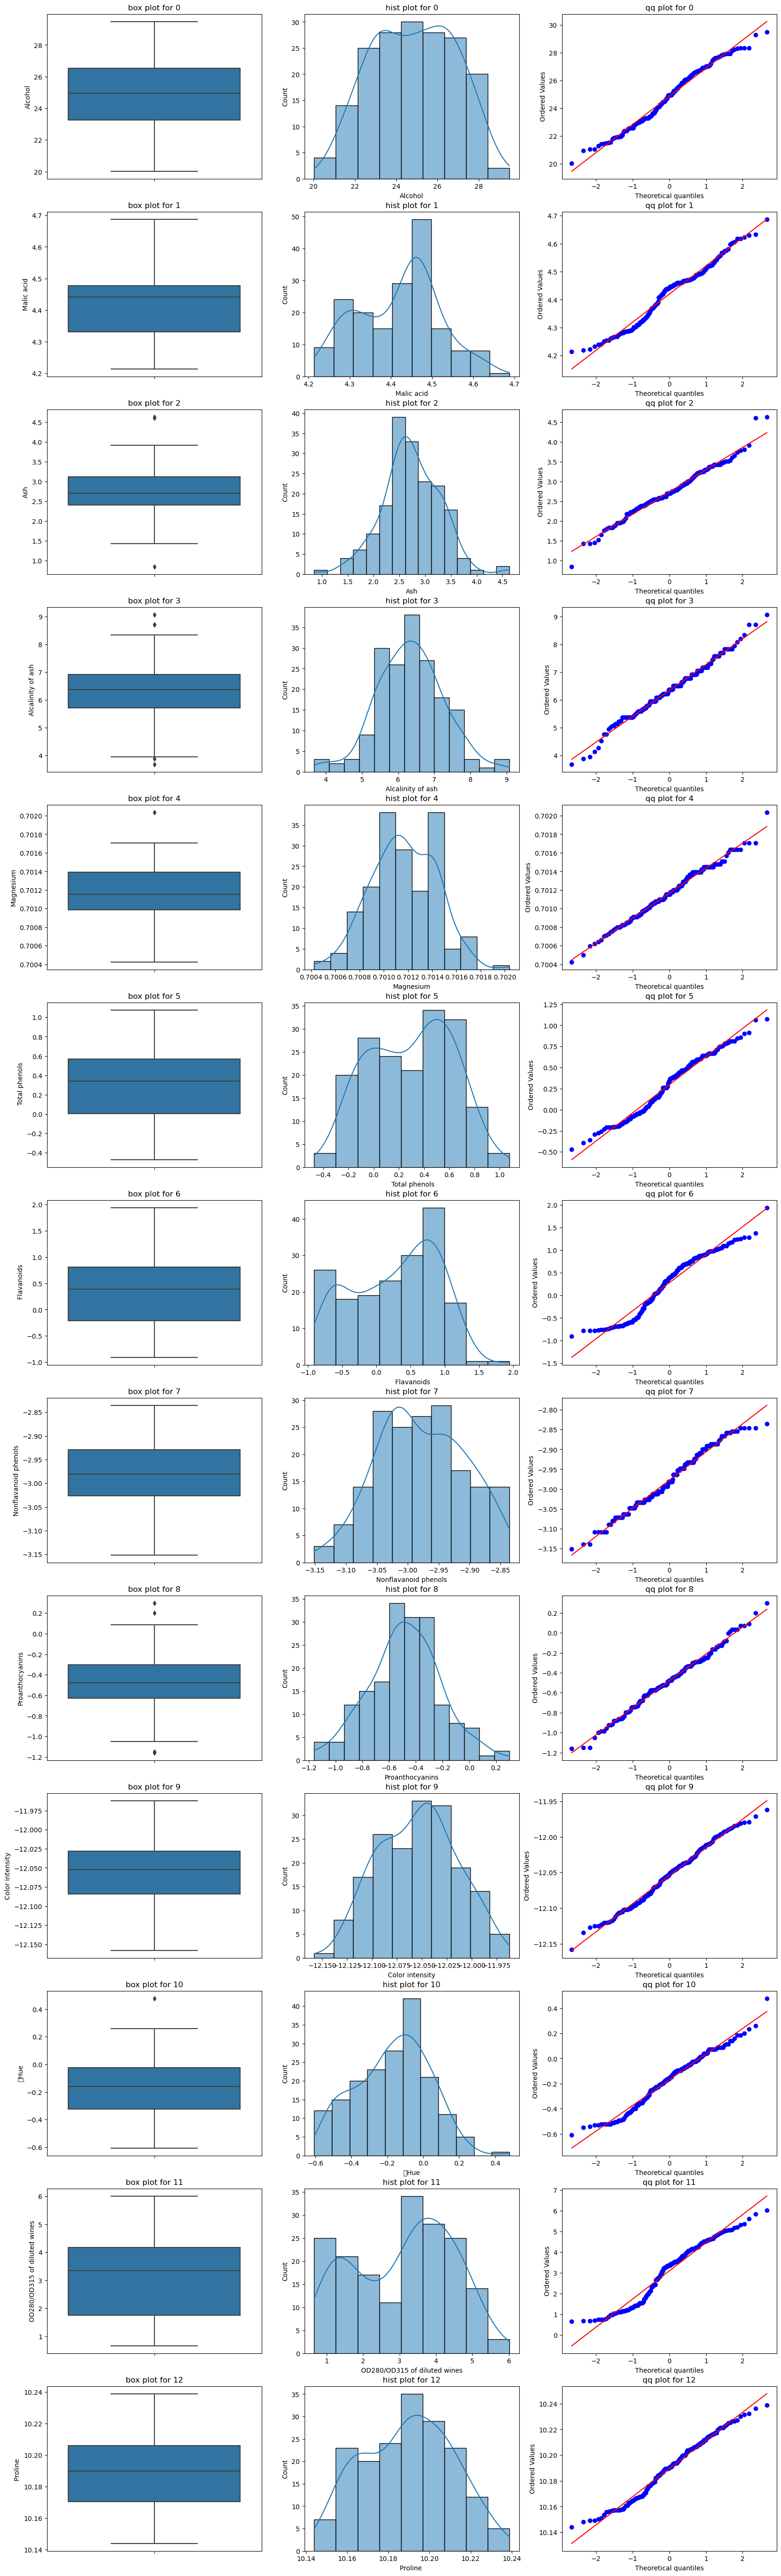

In [44]:
plt.figure(figsize=(20,70))
j=1

features=["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium"," Total phenols"," Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","	Hue","OD280/OD315 of diluted wines","Proline "]
for i in range(len(features)):
    feat,lamda=sp.stats.boxcox(df[features[i]])
    feat_boxcox=(((df[features[i]])**lamda)-1/lamda)

    
    plt.subplot(13,3,j)
    sns.boxplot(data=df,y=feat_boxcox)
    j+=1
    plt.title("box plot for {}".format(i))

    plt.subplot(13,3,j)
    sns.histplot(data=df,x=feat_boxcox,kde=True)
    j+=1
    plt.title("hist plot for {}".format(i))

    plt.subplot(13,3,j)
    sp.stats.probplot(feat_boxcox,plot=plt)
    j+=1
    plt.title("qq plot for {}".format(i))
plt.show()